The dataset we are using today comes from UCI Machine Learning repository. 

The dataset is called “Online Retail” and can be found here. 

It contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered online retailer.

In [1]:
# load the library tidyverse
# If it not available download pxR library
if(!require("tidyverse")) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
library(tidyverse)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# load the library knitr
# If it not available download knitr library
if(!require("knitr")) install.packages("knitr", repos = "http://cran.r-project.org")
library(knitr)

Loading required package: knitr


In [3]:
# load the library arules
# If it not available download knitr library
if(!require("arules")) install.packages("arules", repos = "http://cran.r-project.org")
library(arules)

Loading required package: arules
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘arules’

The following object is masked from ‘package:dplyr’:

    recode

The following objects are masked from ‘package:base’:

    abbreviate, write



In [4]:
# load the library arulesViz
# If it not available download knitr library
if(!require("arulesViz")) install.packages("arulesViz", repos = "http://cran.r-project.org")
library(arulesViz)

Loading required package: arulesViz
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arulesViz’”also installing the dependencies ‘modeltools’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘mvtnorm’, ‘trimcluster’, ‘gridExtra’, ‘fpc’, ‘viridis’, ‘gtools’, ‘gdata’, ‘caTools’, ‘TSP’, ‘qap’, ‘cluster’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘crosstalk’, ‘htmlwidgets’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘DT’, ‘plotly’, ‘visNetwork’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid


### Load the packages

In [10]:
library(tidyverse)
library(readxl) # import
library(knitr)
library(ggplot2) # visualise 
library(lubridate)
library(arules) # program 
library(arulesViz) # program
library(plyr) 

### Data preprocessing and exploring

In [15]:
retail <- read_xls('OnlineRetail.xlsx')

ERROR: Error in read_fun(path = path, sheet_i = sheet, limits = limits, shim = shim, : Failed to open OnlineRetail.xlsx


In [12]:
retail <- read_excel('OnlineRetail.xls')

ERROR: Error in read_fun(path = path, sheet_i = sheet, limits = limits, shim = shim, : Failed to open OnlineRetail.xls


Issues: https://github.com/tidyverse/readxl/issues/373 [4 Oct 2017] 

Note2Shelf: Makesure all Library is loaded. Use xlsx file [8 OCt 2017]

In [14]:
retail <- retail[complete.cases(retail), ]
retail %>% mutate(Description = as.factor(Description))
retail %>% mutate(Country = as.factor(Country))
retail$Date <- as.Date(retail$InvoiceDate)
retail$Time <- format(retail$InvoiceDate,"%H:%M:%S")
retail$InvoiceNo <- as.numeric(as.character(retail$InvoiceNo))
glimpse(retail)

ERROR: Error in eval(expr, envir, enclos): object 'retail' not found


### What time do people often purchase online?

In [3]:
retail$Time <- as.factor(retail$Time)
a <- hms(as.character(retail$Time))
retail$Time = hour(a)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

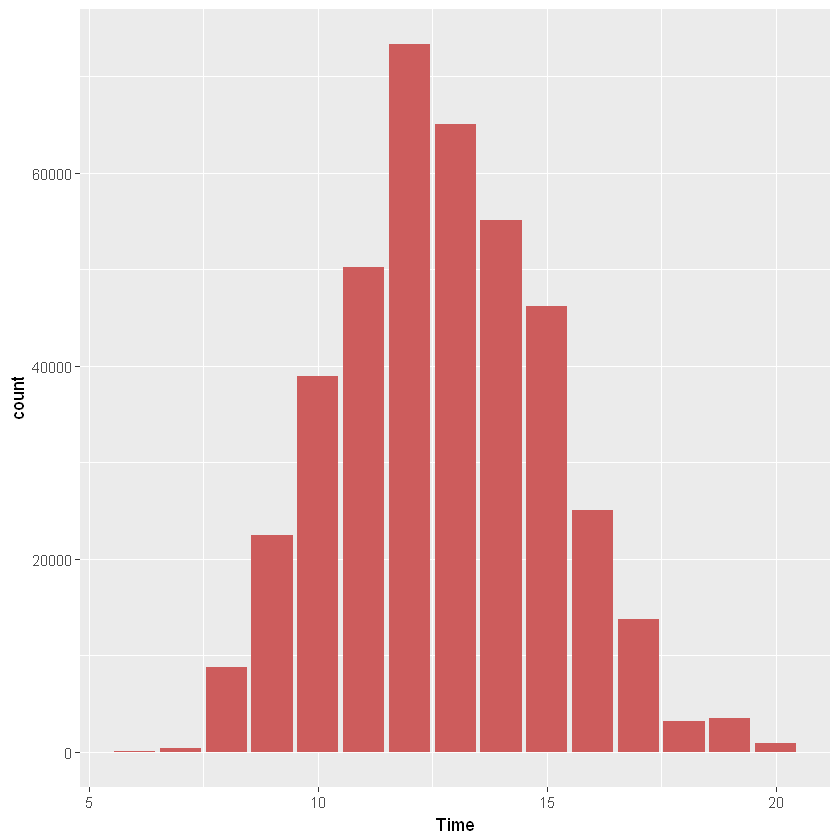

In [4]:
retail %>% 
  ggplot(aes(x=Time)) + 
  geom_histogram(stat="count",fill="indianred")

### How many items each customer buy?

Warning message:
"'plyr' namespace cannot be unloaded:
  namespace 'plyr' is imported by 'broom', 'ggplot2', 'reshape2', 'scales' so cannot be unloaded"

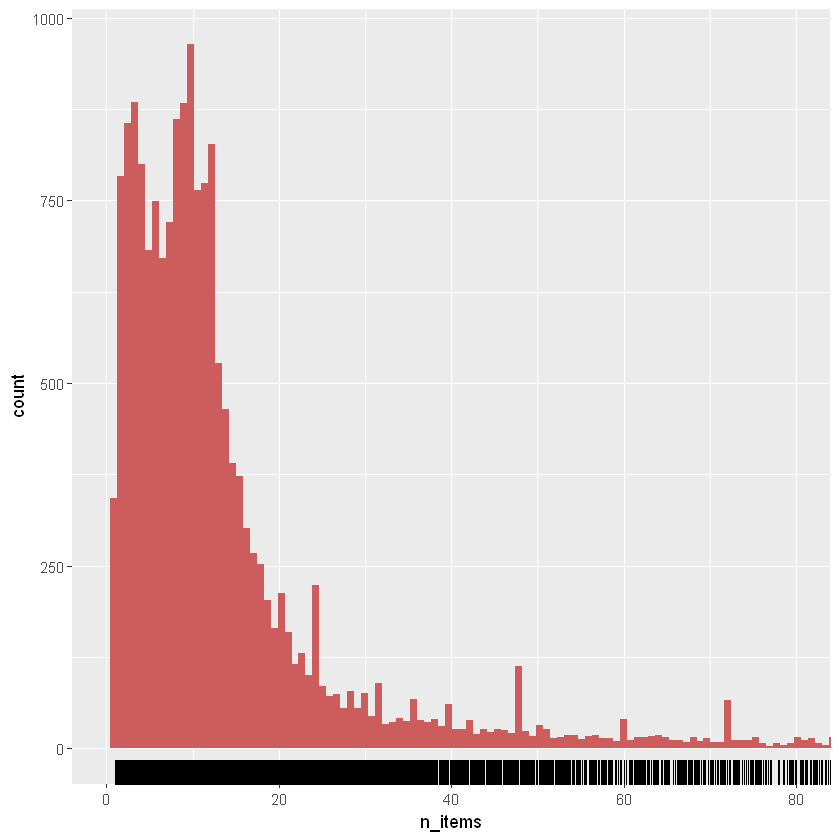

In [6]:
detach("package:plyr", unload=TRUE)
retail %>% 
  group_by(InvoiceNo) %>% 
  summarize(n_items = mean(Quantity)) %>%
  ggplot(aes(x=n_items))+
  geom_histogram(fill="indianred", bins = 100000) + 
  geom_rug()+
  coord_cartesian(xlim=c(0,80))

### Top 10 best sellers

In [7]:
tmp <- retail %>% 
  group_by(StockCode, Description) %>% 
  summarize(count = n()) %>% 
  arrange(desc(count))
tmp <- head(tmp, n=10)
tmp

StockCode Description                        count
1  85123A    WHITE HANGING HEART T-LIGHT HOLDER 2070 
2  22423     REGENCY CAKESTAND 3 TIER           1905 
3  85099B    JUMBO BAG RED RETROSPOT            1662 
4  84879     ASSORTED COLOUR BIRD ORNAMENT      1418 
5  47566     PARTY BUNTING                      1416 
6  20725     LUNCH BAG RED RETROSPOT            1358 
7  22720     SET OF 3 CAKE TINS PANTRY DESIGN   1232 
8  POST      POSTAGE                            1196 
9  20727     LUNCH BAG  BLACK SKULL.            1126 
10 21212     PACK OF 72 RETROSPOT CAKE CASES    1080

In [8]:
tmp %>%
  group_by(StockCode, Description) %>% 
  summarize(count = n()) %>% 
  arrange(desc(count))
tmp %>%
  ggplot(aes(x=reorder(Description,count), y=count))+
  geom_bar(stat="identity",fill="indian red")+
  coord_flip()

StockCode Description                        count
1  20725     LUNCH BAG RED RETROSPOT            1    
2  20727     LUNCH BAG  BLACK SKULL.            1    
3  21212     PACK OF 72 RETROSPOT CAKE CASES    1    
4  22423     REGENCY CAKESTAND 3 TIER           1    
5  22720     SET OF 3 CAKE TINS PANTRY DESIGN   1    
6  47566     PARTY BUNTING                      1    
7  84879     ASSORTED COLOUR BIRD ORNAMENT      1    
8  85099B    JUMBO BAG RED RETROSPOT            1    
9  85123A    WHITE HANGING HEART T-LIGHT HOLDER 1    
10 POST      POSTAGE                            1

### Association rules for online retailer

Before using any rule mining algorithm, we need to transform the data from the data frame format, into transactions such that we have all the items bought together in one row. For example, this is the format we need:

In [9]:
retail_sorted <- retail[order(retail$CustomerID),]
library(plyr)
itemList <- ddply(retail,c("CustomerID","Date"), 
                       function(df1)paste(df1$Description, 
                       collapse = ","))

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following object is masked from 'package:lubridate':

    here

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact



We only need item transactions, so remove customerID and Date columns

In [10]:
itemList$CustomerID <- NULL
itemList$Date <- NULL
colnames(itemList) <- c("items")

Write the data fram to a csv file and check whether our transaction format is correct.

In [12]:
write.csv(itemList,"result/market_basket.csv", quote = FALSE, row.names = TRUE)

Let’s have a closer look at how many transactions we have and what they are.

In [13]:
tr <- read.transactions('result/market_basket.csv', format = 'basket', sep=',')
tr
summary(tr)

Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text

transactions in sparse format with
 19297 transactions (rows) and
 27165 items (columns)

transactions as itemMatrix in sparse format with
 19297 rows (elements/itemsets/transactions) and
 27165 columns (items) and a density of 0.0006701659 

most frequent items:
WHITE HANGING HEART T-LIGHT HOLDER           REGENCY CAKESTAND 3 TIER 
                              1758                               1660 
           JUMBO BAG RED RETROSPOT                      PARTY BUNTING 
                              1434                               1271 
     ASSORTED COLOUR BIRD ORNAMENT                            (Other) 
                              1237                             343943 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1 2263 1189  851  768  725  662  618  597  582  554  572  506  487  508  504 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 503  449  413  477  420  383  304  313  270  237  253  223  204  222  216  171 
  33   34   35   3

Let’s have a look at the item frequency plot

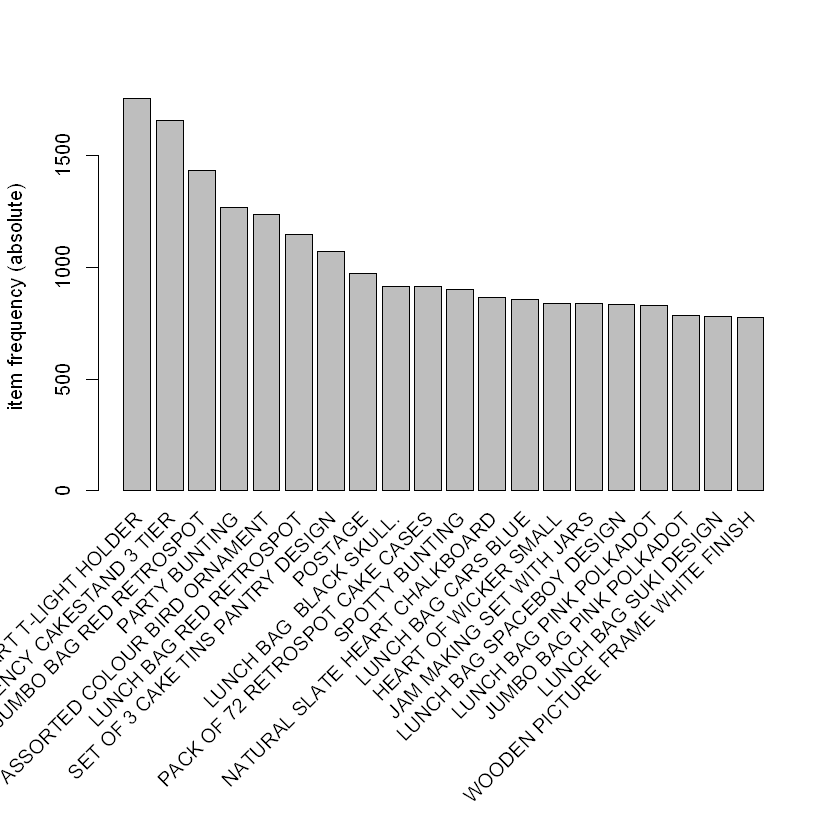

In [14]:
itemFrequencyPlot(tr, topN=20, type='absolute')

Have a look at the summary of the rules:

In [15]:
rules <- apriori(tr, parameter = list(supp=0.001, conf=0.8))
rules <- sort(rules, by='confidence', decreasing = TRUE)
summary(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[27165 item(s), 19297 transaction(s)] done [0.14s].
sorting and recoding items ... [2407 item(s)] done [0.02s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(tr, parameter = list(supp = 0.001, conf = 0.8)):
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"

 done [0.94s].
writing ... [87110 rule(s)] done [0.14s].
creating S4 object  ... done [0.12s].


set of 87110 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
  105  3133  9732 26228 29873 14020  3218   680   121 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.000   5.627   6.000  10.000 

summary of quality measures:
    support           confidence          lift             count       
 Min.   :0.001036   Min.   :0.8000   Min.   :  8.781   Min.   : 20.00  
 1st Qu.:0.001088   1st Qu.:0.8333   1st Qu.: 19.305   1st Qu.: 21.00  
 Median :0.001192   Median :0.8750   Median : 24.786   Median : 23.00  
 Mean   :0.001383   Mean   :0.8834   Mean   : 50.921   Mean   : 26.69  
 3rd Qu.:0.001503   3rd Qu.:0.9231   3rd Qu.: 43.662   3rd Qu.: 29.00  
 Max.   :0.018086   Max.   :1.0000   Max.   :622.484   Max.   :349.00  

mining info:
 data ntransactions support confidence
   tr         19297   0.001        0.8

In [27]:
inspect(rules[1:20]) # We have 89,697 rules. Let’s inspect the top 20.

     lhs                         rhs                support     confidence
[1]  {WOBBLY CHICKEN}         => {DECORATION}       0.001451003 1         
[2]  {WOBBLY CHICKEN}         => {METAL}            0.001451003 1         
[3]  {DECOUPAGE}              => {GREETING CARD}    0.001191895 1         
[4]  {BILLBOARD FONTS DESIGN} => {WRAP}             0.001502824 1         
[5]  {WOBBLY RABBIT}          => {DECORATION}       0.001761932 1         
[6]  {WOBBLY RABBIT}          => {METAL}            0.001761932 1         
[7]  {BLACK TEA}              => {SUGAR JARS}       0.002331969 1         
[8]  {BLACK TEA}              => {COFFEE}           0.002331969 1         
[9]  {ART LIGHTS}             => {FUNK MONKEY}      0.001969218 1         
[10] {FUNK MONKEY}            => {ART LIGHTS}       0.001969218 1         
[11] {CHOCOLATE  SPOTS}       => {SWISS ROLL TOWEL} 0.002176504 1         
[12] {WHITE TEA}              => {SUGAR JARS}       0.003316578 1         
[13] {WHITE TEA}         

customers who bought “WOBBLY CHICKEN” also bought “DECORATION”.

customers who bought “BLACK TEA” also bought “SUGAR JAR”.

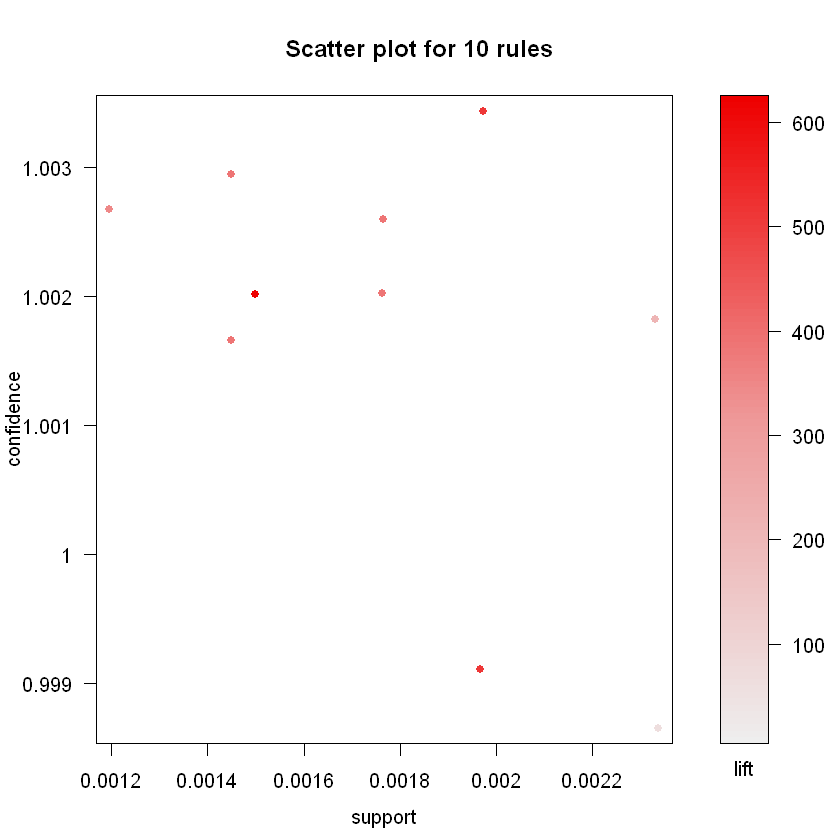

In [16]:
topRules <- rules[1:10]
plot(topRules)

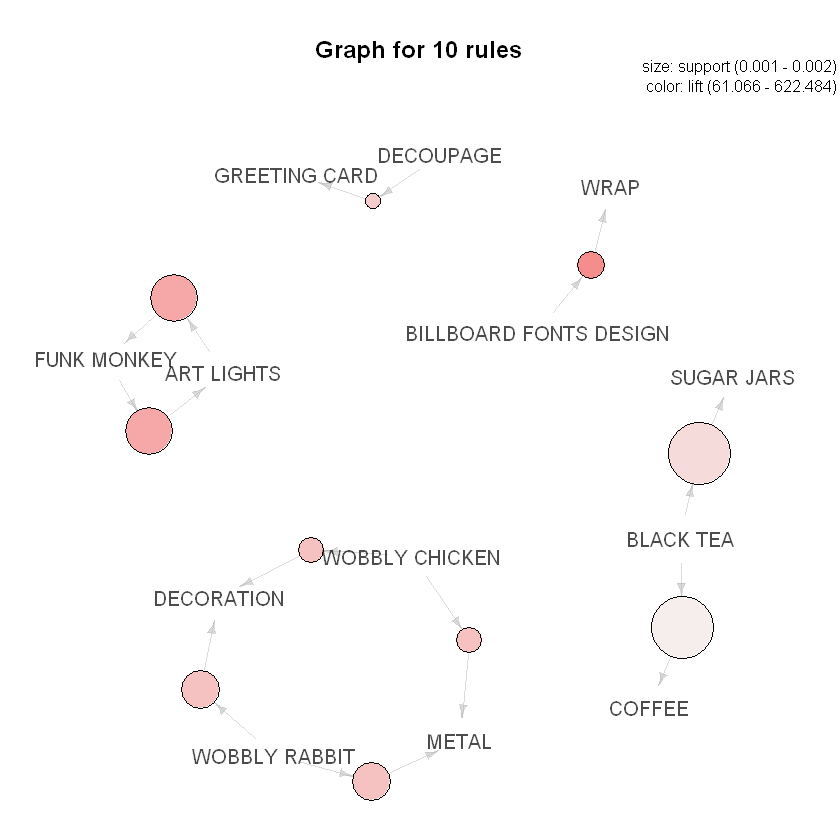

In [17]:
plot(topRules, method="graph")

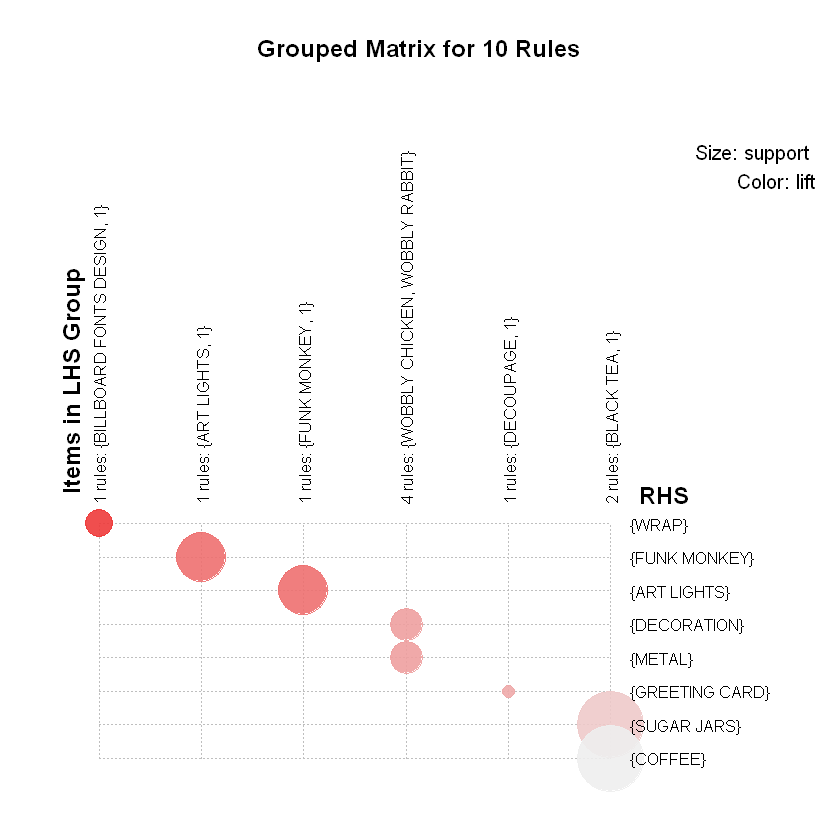

In [18]:
plot(topRules, method = "grouped")